# Importing Necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Data Loading

In [2]:
!ls ../input/heartbeat/mitbih_test.csv  mitbih_train.csv  ptbdb_abnormal.csv  ptbdb_normal.csv

ls: cannot access 'mitbih_train.csv': No such file or directory
ls: cannot access 'ptbdb_abnormal.csv': No such file or directory
ls: cannot access 'ptbdb_normal.csv': No such file or directory
../input/heartbeat/mitbih_test.csv


# Importing Train Data

In [3]:
data = pd.read_csv("../input/heartbeat/mitbih_train.csv", header=None)
data=pd.DataFrame(data)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


# Data Preprocessing

In [5]:
data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,87554.0,0.890360,0.240909,0.0,0.921922,0.991342,1.000000,1.0
1,87554.0,0.758160,0.221813,0.0,0.682486,0.826013,0.910506,1.0
2,87554.0,0.423972,0.227305,0.0,0.250969,0.429472,0.578767,1.0
3,87554.0,0.219104,0.206878,0.0,0.048458,0.166000,0.341727,1.0
4,87554.0,0.201127,0.177058,0.0,0.082329,0.147878,0.258993,1.0
...,...,...,...,...,...,...,...,...
183,87554.0,0.003471,0.036255,0.0,0.000000,0.000000,0.000000,1.0
184,87554.0,0.003221,0.034789,0.0,0.000000,0.000000,0.000000,1.0
185,87554.0,0.002945,0.032865,0.0,0.000000,0.000000,0.000000,1.0
186,87554.0,0.002807,0.031924,0.0,0.000000,0.000000,0.000000,1.0


In [7]:
data[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

As we can see our data is imbalanced so we will apply Undersampling

In [8]:
# Applying Undersampling
class_1 = data[data[187]==1.0]
class_2 = data[data[187]==2.0]
class_3 = data[data[187]==3.0]
class_4 = data[data[187]==4.0]
class_0 = data[data[187]==0.0].sample(n = 8000)
data = pd.concat([class_1, class_2, class_3, class_4, class_0]).sample(frac=1)

In [9]:
data[187].value_counts()

0.0    8000
4.0    6431
2.0    5788
1.0    2223
3.0     641
Name: 187, dtype: int64

# Spliting Data into Train and Test and Reshaping the data

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(data.drop([187], axis=1), data[187], test_size = 0.1)

In [11]:
xtrain = np.array(xtrain).reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = np.array(xtest).reshape(xtest.shape[0], xtest.shape[1], 1)

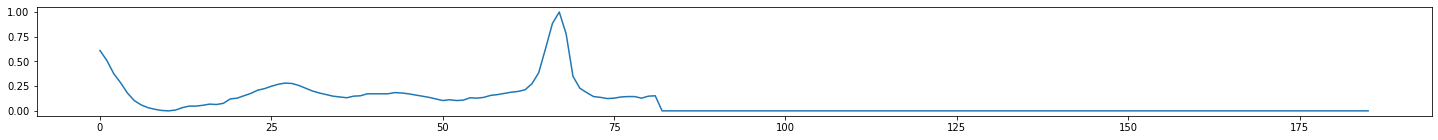

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(25,2))
ax.plot(data[data[187]==float(1)].sample(1).iloc[0,:186])


#Applying CNN

In [13]:
neu = Sequential()

neu.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (xtrain.shape[1],1)))
neu.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
neu.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

neu.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
neu.add(Dropout(0.5))

neu.add(Flatten())

neu.add(Dense(units = 512, activation='relu'))
neu.add(Dense(units = 1024, activation='relu'))
neu.add(Dense(units = 5, activation='softmax'))

neu.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
his = neu.fit(xtrain, ytrain, epochs = 10)

Epoch 1/10
650/650 [==============================] - 7s 5ms/step - loss: 0.5812 - accuracy: 0.7786
Epoch 2/10
650/650 [==============================] - 3s 4ms/step - loss: 0.2192 - accuracy: 0.9265
Epoch 3/10
650/650 [==============================] - 3s 4ms/step - loss: 0.1573 - accuracy: 0.9481
Epoch 4/10
650/650 [==============================] - 3s 4ms/step - loss: 0.1266 - accuracy: 0.9563
Epoch 5/10
650/650 [==============================] - 4s 5ms/step - loss: 0.0999 - accuracy: 0.9662
Epoch 6/10
650/650 [==============================] - 3s 4ms/step - loss: 0.0867 - accuracy: 0.9686
Epoch 7/10
650/650 [==============================] - 3s 4ms/step - loss: 0.0767 - accuracy: 0.9719
Epoch 8/10
650/650 [==============================] - 3s 4ms/step - loss: 0.0621 - accuracy: 0.9777
Epoch 9/10
650/650 [==============================] - 3s 5ms/step - loss: 0.0549 - accuracy: 0.9814
Epoch 10/10
650/650 [==============================] - 3s 4ms/step - loss: 0.0473 - accuracy: 0.9831

# Making Predictions using training data

In [15]:
ypred_train = neu.predict(xtest)

<AxesSubplot:>

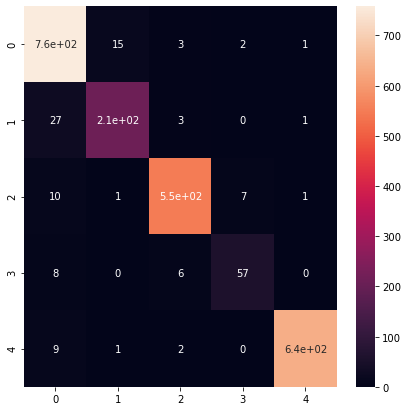

In [16]:
y_lbl = [np.where(i == np.max(i))[0][0] for i in ypred_train]
mat = confusion_matrix(ytest, y_lbl)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(mat, annot = True)

In [17]:
print("Accuracy score of the predictions: {0}".format(accuracy_score(y_lbl, ytest)))

Accuracy score of the predictions: 0.9579904720658293


# Loading Test Data Test

In [18]:
test = pd.read_csv("../input/heartbeat/mitbih_test.csv", header=None)
test=pd.DataFrame(test)

In [19]:
test

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


# Data Preprocessing

In [20]:
test[187].value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64

In [21]:
# Applying Under Sampling
class_1 = test[test[187]==1.0]
class_2 = test[test[187]==2.0]
class_3 = test[test[187]==3.0]
class_4 = test[test[187]==4.0]
class_0 = test[test[187]==0.0].sample(n = 3000)
test = pd.concat([class_1, class_2, class_3, class_4, class_0]).sample(frac=1)

In [22]:
test[187].value_counts()

0.0    3000
4.0    1608
2.0    1448
1.0     556
3.0     162
Name: 187, dtype: int64

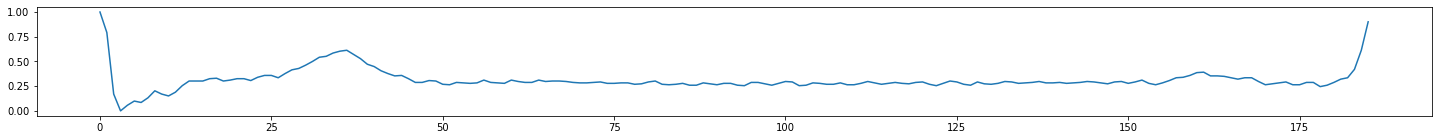

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(25,2))
ax.plot(test[test[187]==float(1)].sample(1).iloc[0,:186])


# Making Predictions using testing data 

In [24]:
xtest = test.drop([187], axis=1) 
ytest = test[187]

xtest = np.array(xtest).reshape(xtest.shape[0], xtest.shape[1], 1)

In [25]:
ytest_pred = neu.predict(xtest)

<AxesSubplot:>

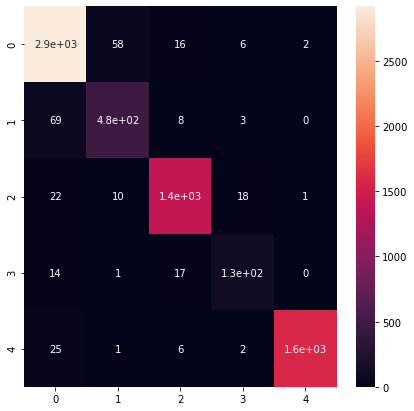

In [26]:
ytest_lbl = [np.where(i == np.max(i))[0][0] for i in ytest_pred]
mat = confusion_matrix(ytest, ytest_lbl)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(mat, annot = True)

In [27]:
print("Accuracy score of the predictions: {0}".format(accuracy_score(ytest_lbl, ytest)))

Accuracy score of the predictions: 0.9588131089459699
